In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [6]:
t=pd.read_csv("C:\\Users\\bramhad\\OneDrive - Konecranes Plc\\Desktop\\Data Science\\ExcelR\\Assignments\\5_Multi Linear Regression\\ToyotaCorolla.csv",encoding='latin1')
t

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


## EDA

In [7]:
t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [10]:
t1=pd.concat([t.iloc[:,2:4],t.iloc[:,6:7],t.iloc[:,8:9],t.iloc[:,12:14],t.iloc[:,15:18]],axis=1)
t1

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [12]:
t2=t1.rename({'Price':'p','Age_08_04':'a','KM':'k','HP':'h','cc':'c','Doors':'d','Gears':'g','Quarterly_Tax':'qt','Weight':'w'},axis=1)
t2

,p,a,k,h,c,d,g,qt,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [13]:
t2[t2.duplicated()]

,p,a,k,h,c,d,g,qt,w
113,24950,8,13253,116,2000,5,5,234,1320


In [15]:
t3=t2.drop_duplicates().reset_index(drop=True)
t3

,p,a,k,h,c,d,g,qt,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [16]:
t3.describe()

,p,a,k,h,c,d,g,qt,w
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


Finding the correlation between the features now

In [17]:
t3.corr()

,p,a,k,h,c,d,g,qt,w
p,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.183604,0.063831,0.211508,0.575869
a,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.146929,-0.005629,-0.193319,-0.466484
k,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.035193,0.014890,0.283312,-0.023969
h,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.091803,0.209642,-0.302287,0.087143
c,0.124375,-0.096549,0.103822,0.035207,1.000000,0.079254,0.014732,0.305982,0.335077
d,0.183604,-0.146929,-0.035193,0.091803,0.079254,1.000000,-0.160101,0.107353,0.301734
g,0.063831,-0.005629,0.014890,0.209642,0.014732,-0.160101,1.000000,-0.005125,0.021238
qt,0.211508,-0.193319,0.283312,-0.302287,0.305982,0.107353,-0.005125,1.000000,0.621988
w,0.575869,-0.466484,-0.023969,0.087143,0.335077,0.301734,0.021238,0.621988,1.000000


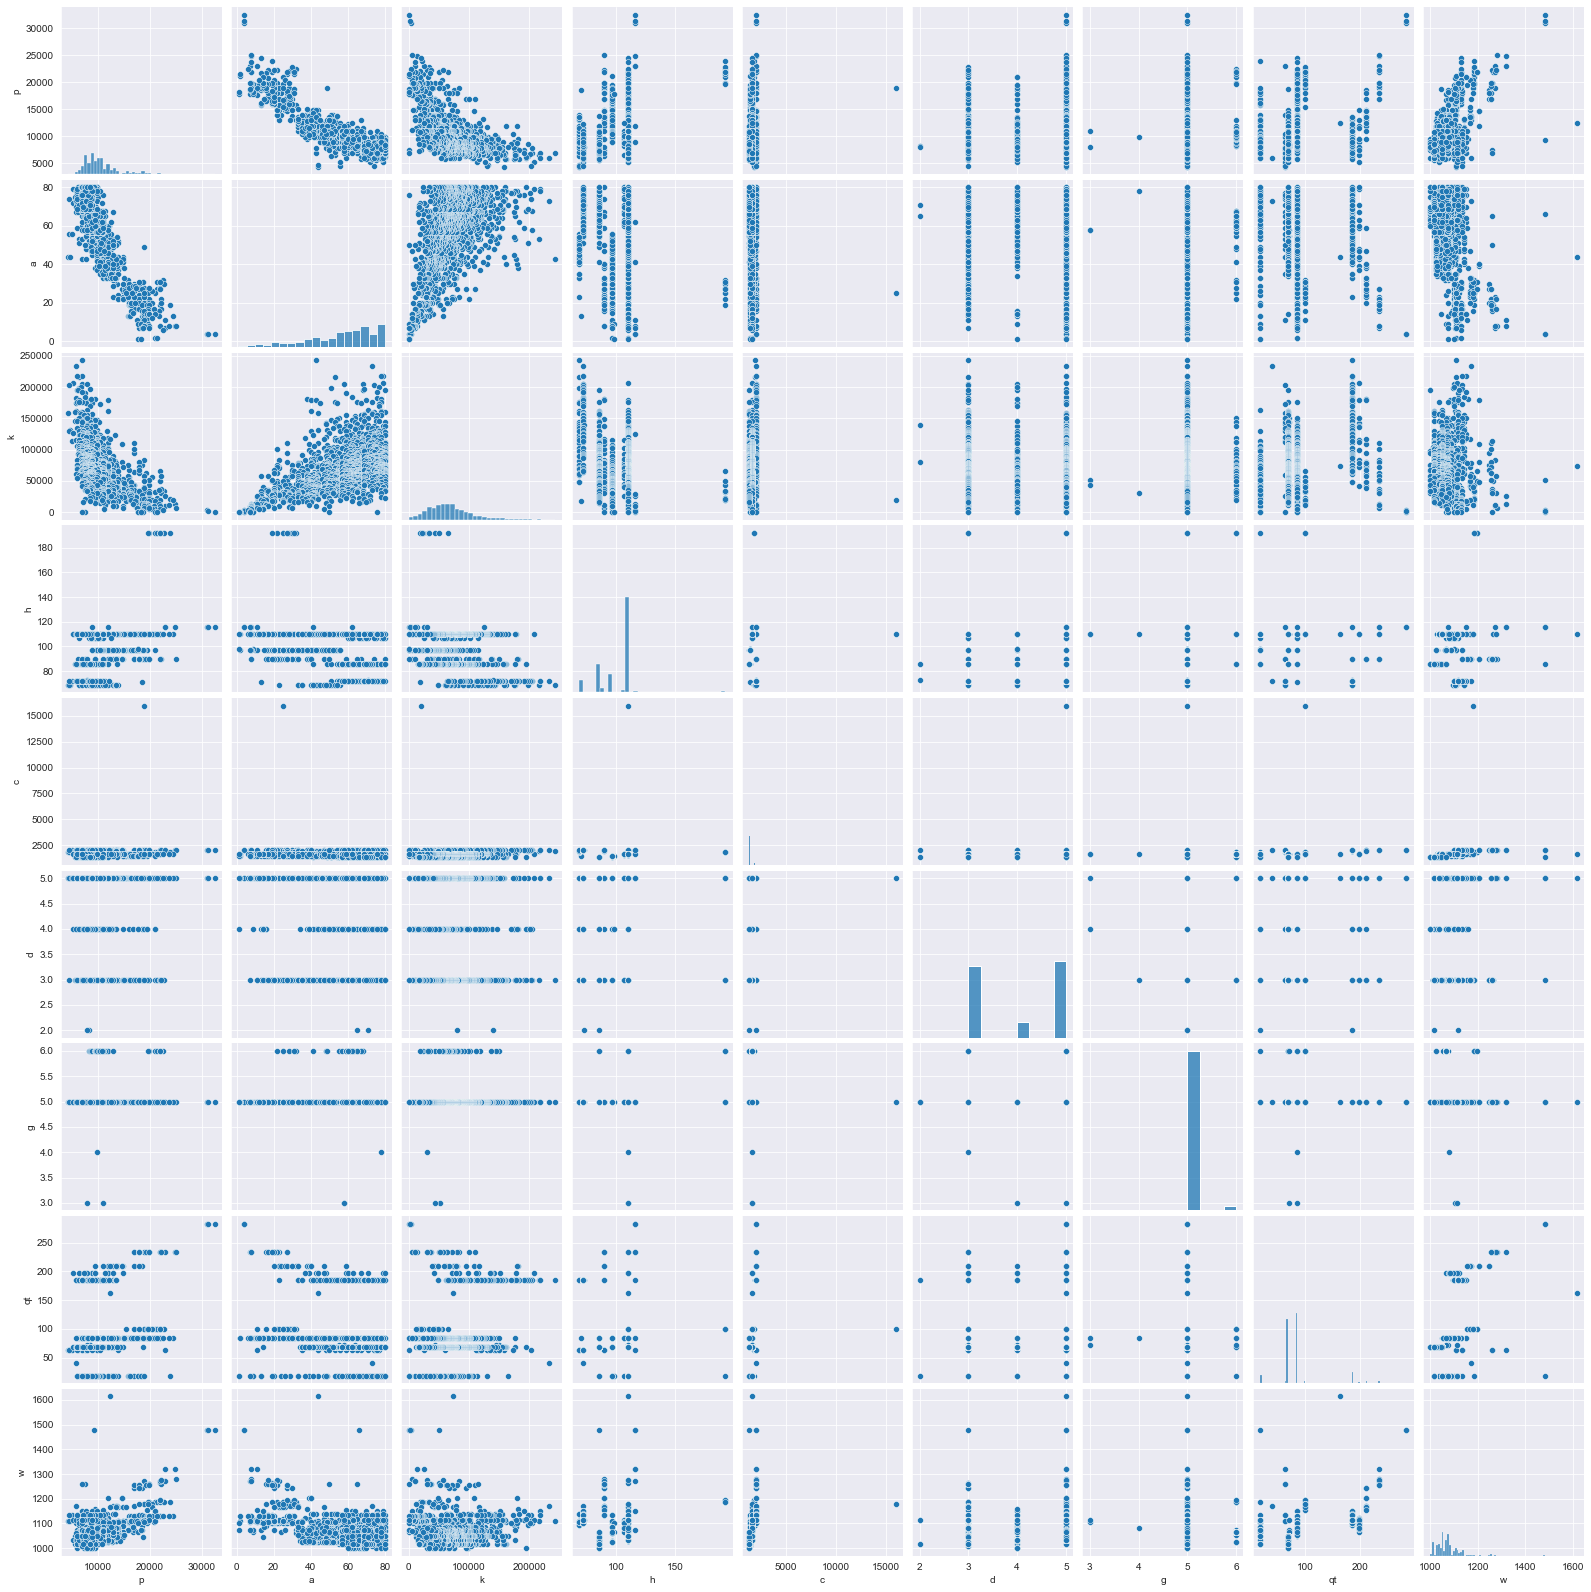

In [18]:
sns.set_style(style='darkgrid')
sns.pairplot(t3)

Creating Model now with all feature consideration

In [19]:
m1=smf.ols('p~a+k+h+c+d+g+qt+w',data=t3).fit()

In [20]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        10:24:48   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
a           -121.7139      2.615    -46.552      0.000    -126.843    -116.585
k             -0.0207      0.001    -16.552      0.000      -0.023      -0.018
h             31.5846      2.818     11.210      0.000      26.058      37.112
c             -0.1186      0.090     -1.316      0.188      -0.295       0.058
d             -0.9202     39.988     -0.023      0.982     -79.362      77.522
g            597.7159    196.969      3.035      0.002     211.335     984.097
qt             3.8588      1.311      2.944      0.003       1.288       6.430
w             16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
m1.tvalues , np.round(m1.pvalues,7)

(Intercept    -3.875273
 a           -46.551876
 k           -16.552424
 h            11.209719
 c            -1.316436
 d            -0.023012
 g             3.034563
 qt            2.944198
 w            15.760663
 dtype: float64,
 Intercept    0.000111
 a            0.000000
 k            0.000000
 h            0.000000
 c            0.188239
 d            0.981644
 g            0.002452
 qt           0.003290
 w            0.000000
 dtype: float64)

As for C and d p values are much larger than alpha value these are not significant features to consider for model building.

Now creating the Single linear regreesion model with these features with price feature

In [25]:
mc=smf.ols('p~c',data=t3).fit()

In [26]:
mc.tvalues

Intercept    24.879592
c             4.745039
dtype: float64

In [27]:
mc.pvalues

Intercept    7.236022e-114
c             2.292856e-06
dtype: float64

In [28]:
md=smf.ols('p~d',data=t3).fit()

In [29]:
md.tvalues , md.pvalues

(Intercept    19.421546
 d             7.070520
 dtype: float64,
 Intercept    8.976407e-75
 d            2.404166e-12
 dtype: float64)

As in the single linear variable the p value is lesser than alpha we can not ignore it simply for model buliding

In [30]:
mcd=smf.ols('p~c+d',data=t3).fit()

In [31]:
mcd.tvalues , mcd.pvalues

(Intercept    12.786341
 c             4.268006
 d             6.752236
 dtype: float64,
 Intercept    1.580945e-35
 c            2.101878e-05
 d            2.109558e-11
 dtype: float64)

Also combined model of this feature give much lesser p value than the aplha here 

## Model Validation Techniques 
### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [33]:
rsq_a=smf.ols('a~k+h+c+d+g+qt+w',data=t3).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_k=smf.ols('k~a+h+c+d+g+qt+w',data=t3).fit().rsquared
vif_k=1/(1-rsq_k)

rsq_h=smf.ols('h~a+k+c+d+g+qt+w',data=t3).fit().rsquared
vif_h=1/(1-rsq_h)

rsq_c=smf.ols('c~a+h+k+d+g+qt+w',data=t3).fit().rsquared
vif_c=1/(1-rsq_c)

rsq_d=smf.ols('d~a+k+c+g+qt+w+h',data=t3).fit().rsquared
vif_d=1/(1-rsq_d)

rsq_g=smf.ols('g~a+h+k+c+qt+w+d',data=t3).fit().rsquared
vif_g=1/(1-rsq_g)

rsq_qt=smf.ols('qt~a+h+k+c+w+d+g',data=t3).fit().rsquared
vif_qt=1/(1-rsq_qt)

rsq_w=smf.ols('w~a+k+h+c+d+g+qt',data=t3).fit().rsquared
vif_w=1/(1-rsq_w)


dv={'Variables':['a','k','h','c','d','g','qt','w'],
    'Vif':[vif_a,vif_k,vif_h,vif_c,vif_d,vif_g,vif_qt,vif_w]}
Vif_df=pd.DataFrame(dv)
Vif_df

,Variables,Vif
0,a,1.876236
1,k,1.757178
2,h,1.419180
3,c,1.163470
4,d,1.155890
5,g,1.098843
6,qt,2.295375
7,w,2.487180


As all the values are within limits of 0-5 so there is no muliti collinearity occurs here we can consider all the features for regression modeling

Residual Analysis

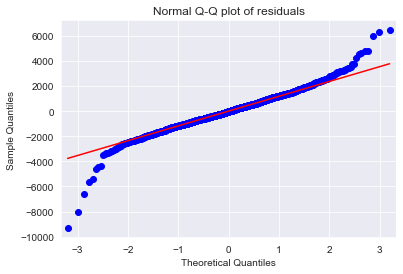

In [34]:
sm.qqplot(m1.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [36]:
list(np.where(m1.resid>6000)) 

[array([109, 146, 522], dtype=int64)]

In [37]:
list(np.where(m1.resid<-6000)) 

[array([220, 600, 959], dtype=int64)]

Test for Homoscedasticity or Heteroscedasticity (standardized fitted values vs standardized residual values)

In [38]:
def standard_values(vals) :
    return (vals-vals.mean())/vals.std()

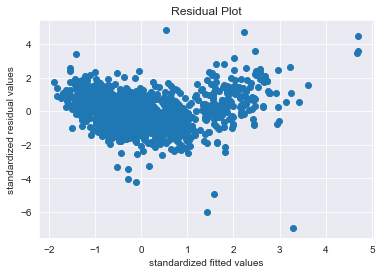

In [39]:
plt.scatter(standard_values(m1.fittedvalues),standard_values(m1.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

## Residuals Vs Regressors

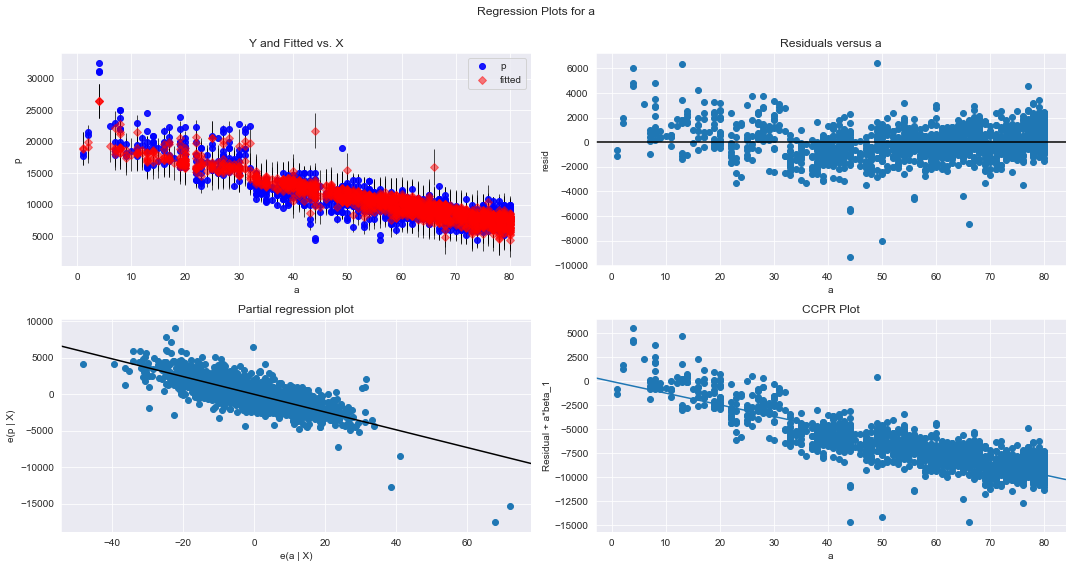

In [40]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'a',fig=fig)
plt.show()

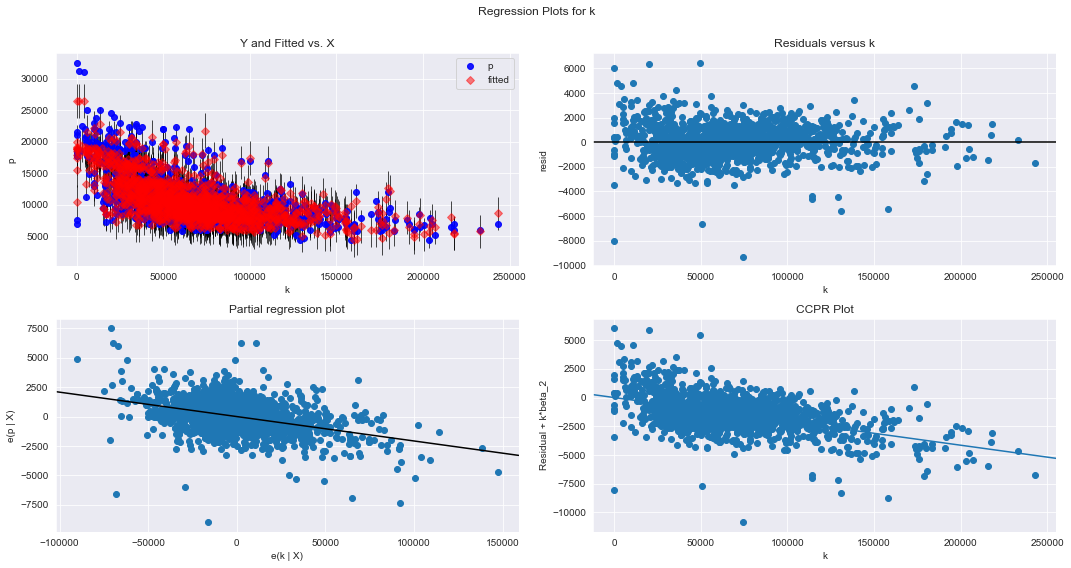

In [41]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'k',fig=fig)
plt.show()

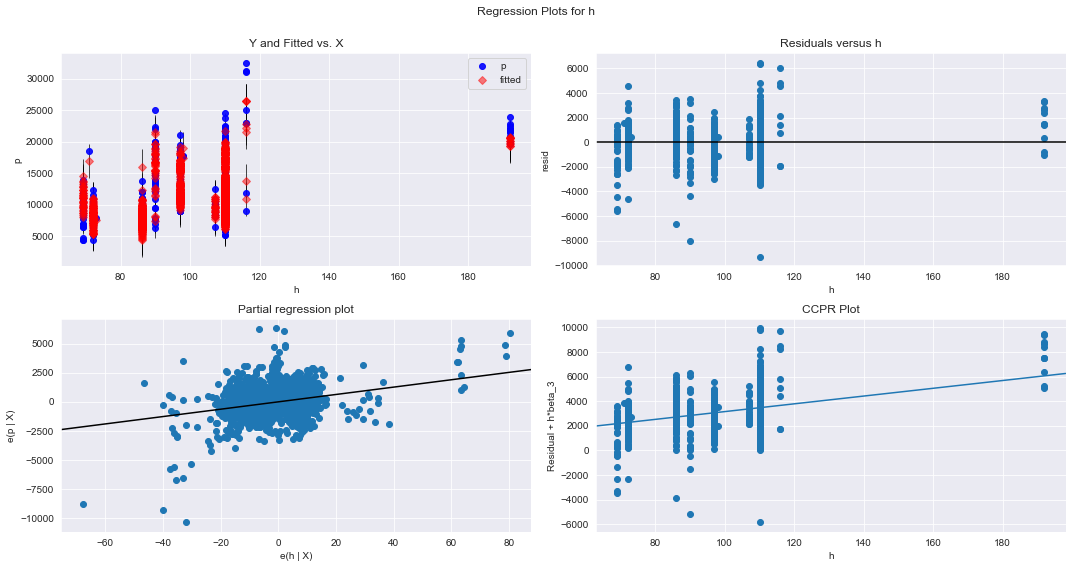

In [42]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'h',fig=fig)
plt.show()

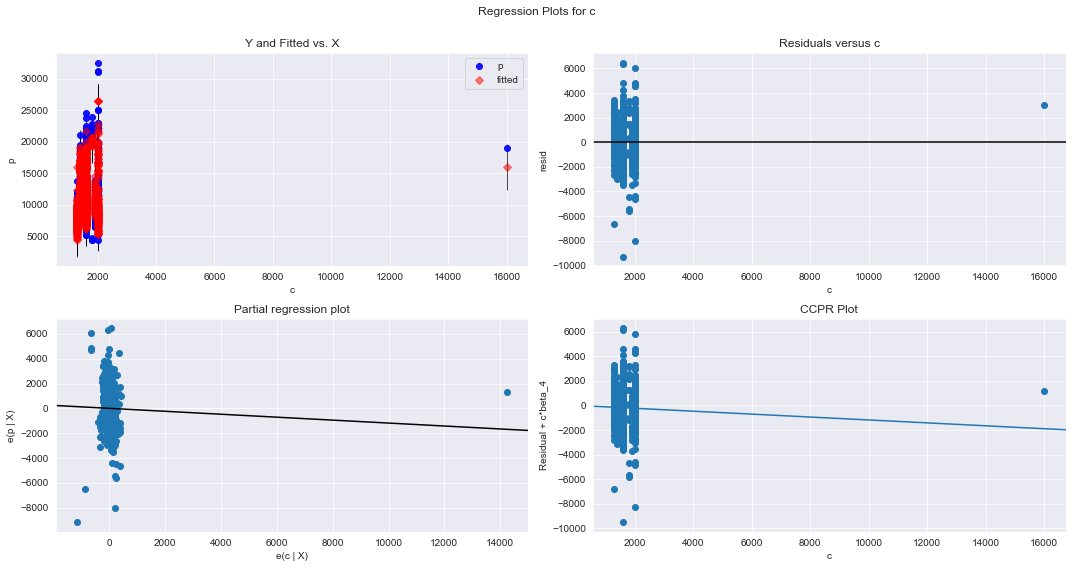

In [43]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'c',fig=fig)
plt.show()

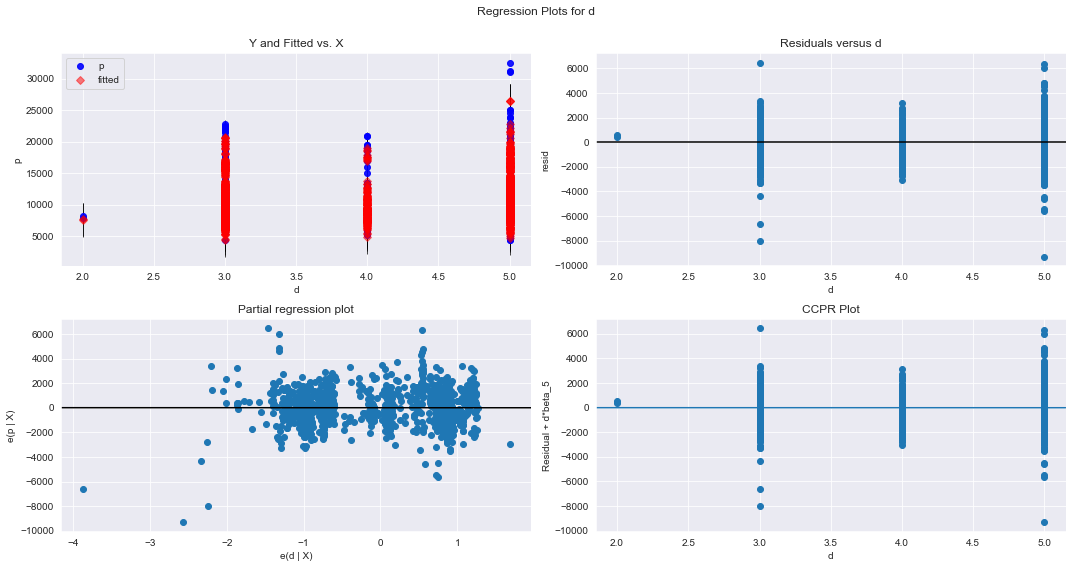

In [44]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'d',fig=fig)
plt.show()

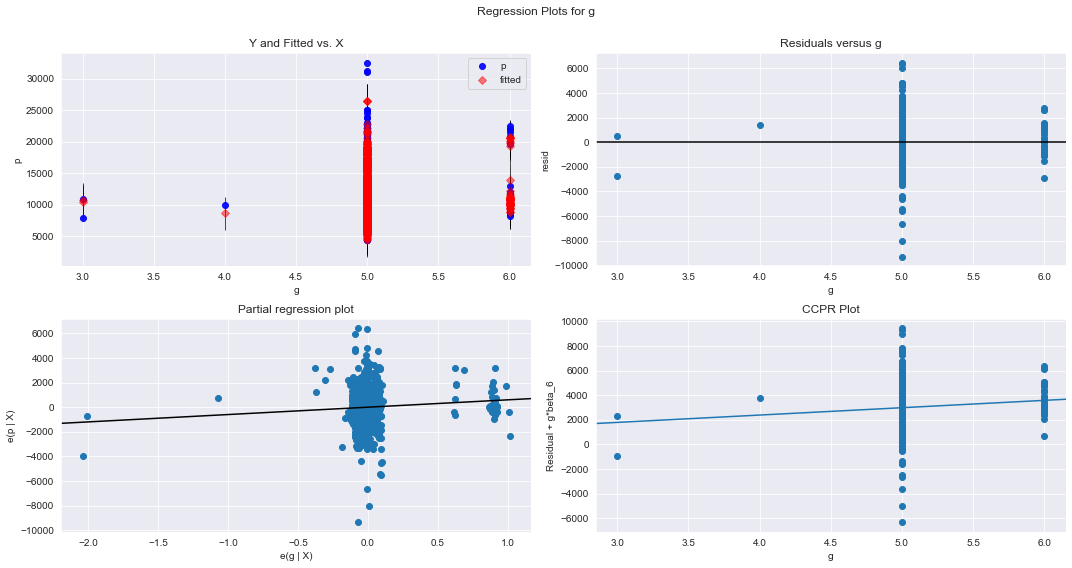

In [45]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'g',fig=fig)
plt.show()

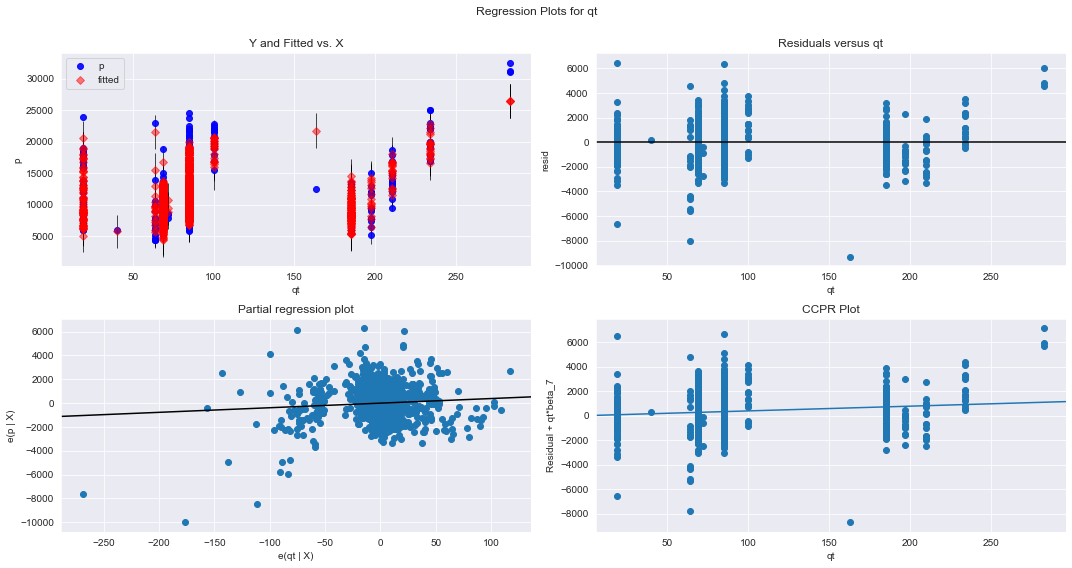

In [46]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'qt',fig=fig)
plt.show()

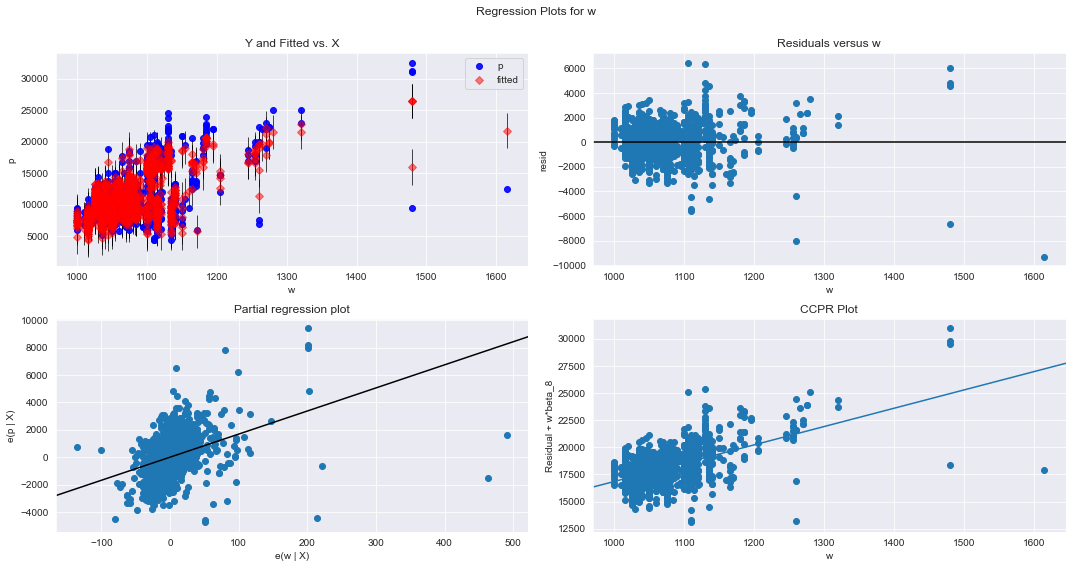

In [47]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(m1,'w',fig=fig)
plt.show()

## Outliers or Influencers if not neccesary then removing these to increase the model accuracy

In [48]:
(c,_)=m1.get_influence().cooks_distance
c

array([7.22221054e-03, 3.94547973e-03, 5.44224039e-03, ...,
       8.04110551e-07, 6.99854767e-04, 1.08408002e-02])

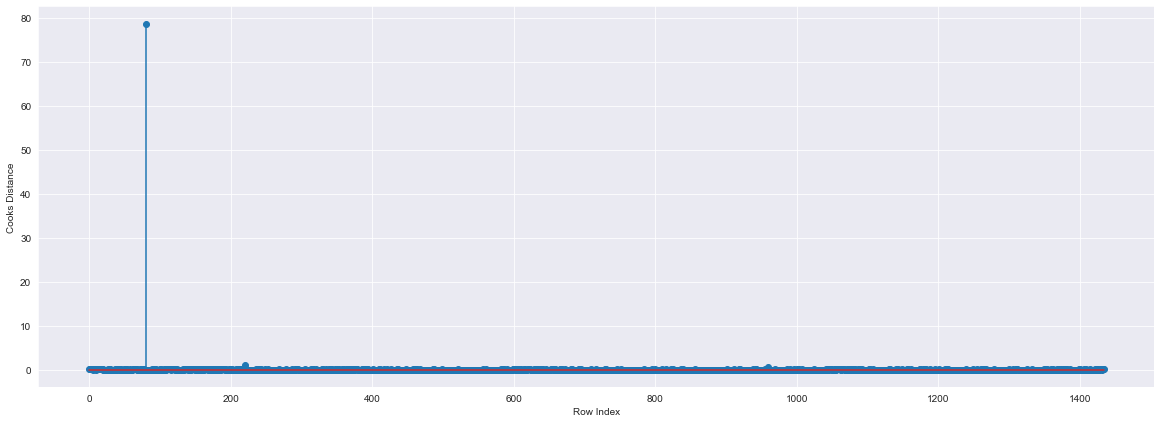

In [54]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(t3)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [55]:
np.argmax(c) , np.max(c)

(80, 78.72950582257265)

This means 80th row having outlier

Now plotting the influencer plot

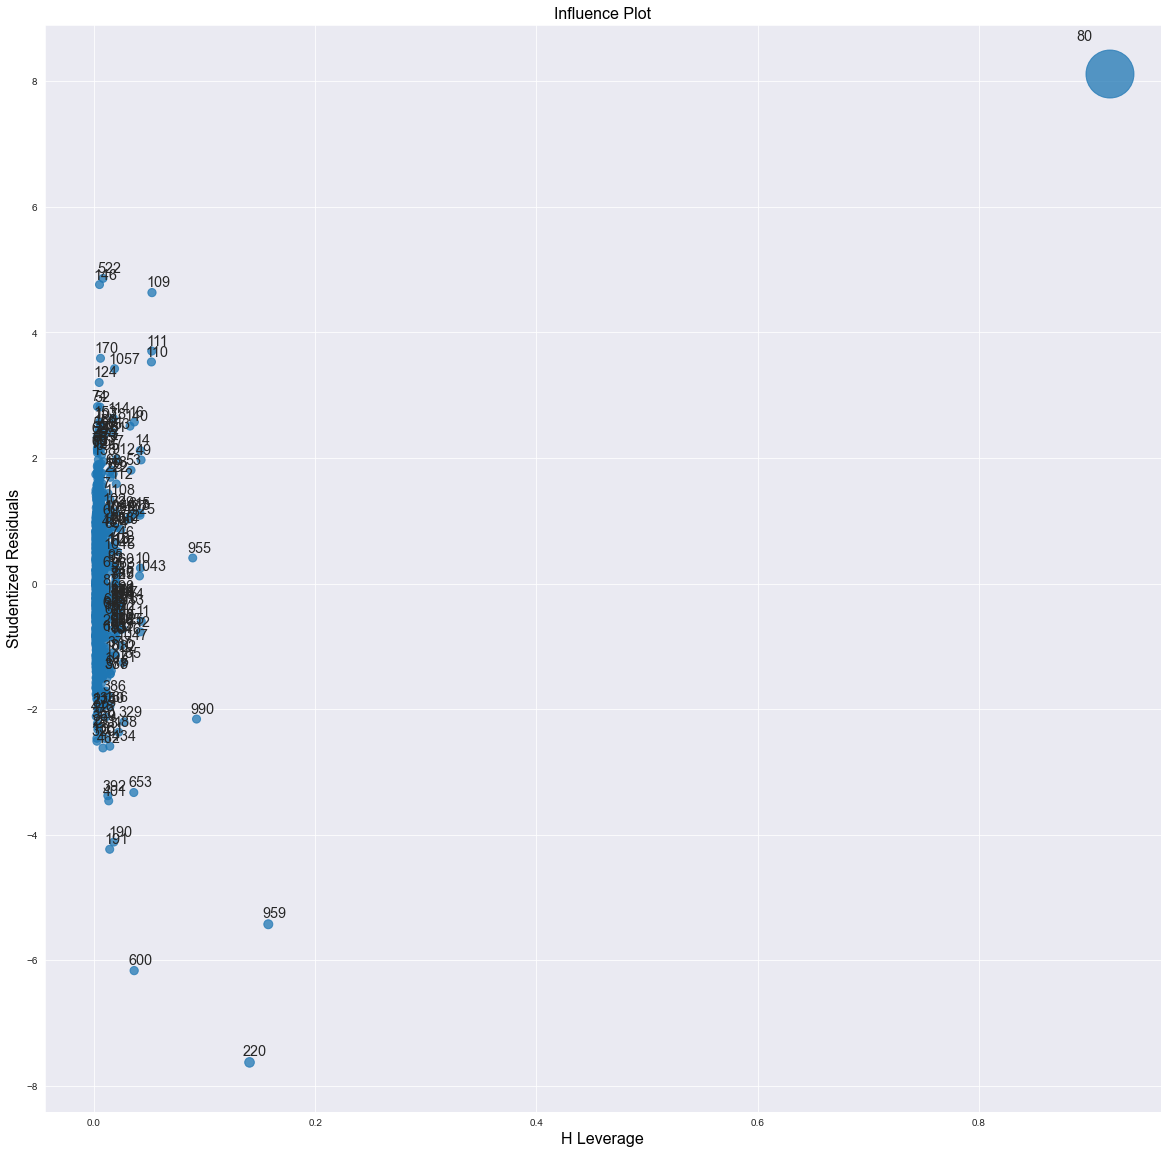

In [57]:
fig,ax=plt.subplots(figsize=(20,20))
fig=influence_plot(m1,ax = ax)

In [58]:
k=t3.shape[1]
n=t3.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.020905923344947737

From the above plot, it is clear that points beyond leverage cutoff value=0.020905 are the outliers , so there are actully many values which are beyond 0.02 but we are considering only 80th row as it is too far from the value of 0.02

So eliminating 80th row from the t3 data and creating new data frame with t4 name

In [59]:
t3[t3.index.isin([80])]

,p,a,k,h,c,d,g,qt,w
80,18950,25,20019,110,16000,5,5,100,1180


In [61]:
t_copy=t3.copy()
t_copy

,p,a,k,h,c,d,g,qt,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,1300,3,5,69,1025
1431,10845,72,19000,86,1300,3,5,69,1015
1432,8500,71,17016,86,1300,3,5,69,1015
1433,7250,70,16916,86,1300,3,5,69,1015


In [63]:
t4=t_copy.drop(t_copy.index[[80]],axis=0).reset_index(drop=True) #reassigning the row number so total count will be right
t4

,p,a,k,h,c,d,g,qt,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


## Creating the final model now

In [65]:
m2=smf.ols('p~a+k+h+c+d+g+qt+w',data=t4).fit()

In [66]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      p   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:26:27   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
a           -120.5074      2.561    -47.048      0.000    -125.532    -115.483
k             -0.0178      0.001    -13.931      0.000      -0.020      -0.015
h             39.2245      2.912     13.470      0.000      33.512      44.937
c             -2.5088      0.307     -8.162      0.000      -3.112      -1.906
d            -26.5129     39.235     -0.676      0.499    -103.478      50.452
g            527.1292    192.832      2.734      0.006     148.864     905.395
qt             8.9414      1.427      6.268      0.000       6.143      11.740
w             20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So for model m2 accuracy is now 86.8% (Taking Adj. R sqaured values)also it is having lesser AIC value so it more accurate than m1 model 

In the model m2 we have dropped only one row let's eliminate other values now where cook's distance is more than 0.5

If we dropped all possible rows which are having cook's distance less than 0.5 then accuracy will increase more

In [75]:
if np.max(c)>0.5:
    m1=smf.ols('p~a+k+h+c+d+g+qt+w',data=t4).fit()
    (c,_)=m1.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    t4=t4.drop(t4.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    t4
elif np.max(c)<0.5:
    m2=smf.ols('p~a+k+h+c+d+g+qt+w',data=t4).fit()
    m2.rsquared_adj,m2.aic
    print("Thus model accuracy is improved to",m2.rsquared_adj)

Thus model accuracy is improved to 0.8876107635439396


In [76]:
t4

,p,a,k,h,c,d,g,qt,w
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1426,7500,69,20544,86,1300,3,5,69,1025
1427,10845,72,19000,86,1300,3,5,69,1015
1428,8500,71,17016,86,1300,3,5,69,1015
1429,7250,70,16916,86,1300,3,5,69,1015


## Predicting the model by passing some values through a data frame

In [78]:
nd=pd.DataFrame({'a':10,'k':45000,'h':85,'c':1600,'d':4,'g':5,'qt':69,'w':1015},index=[0])
nd

,a,k,h,c,d,g,qt,w
0,10,45000,85,1600,4,5,69,1015


In [79]:
m2.predict(nd)

0    13637.939529
dtype: float64